In [20]:
import Pkg; Pkg.add("StatsBase")
using Pkg
Pkg.add("BosonSampling")
using StatsBase
using LinearAlgebra;
using Pkg
Pkg.add("Plots")
using BosonSampling
using Plots
n = 10;m = n^2;

numsamples = 100000;

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [21]:
my_interf = RandHaar(m);

In [22]:
my_input = Input{Bosonic}(ModeOccupation(random_occupancy(n,m)));

In [97]:
numsamples = 1000;
array_of_vectors = [Vector{Int64}(undef, 20) for _ in 1:numsamples];
elapsed_time = @elapsed for i in 1:numsamples
    res = cliffords_sampler(input=my_input, interf=my_interf)
    array_of_vectors[i]=res
    # Add any necessary code to process or store the results inside the loop
end
println("Elapsed time: $elapsed_time seconds")

Elapsed time: 1.342471042 seconds


In [24]:


# Flatten the array of vectors into a single vector
#flattened_data = vcat(array_of_vectors...)

# Create a histogram plot of the flattened data
#histogram(flattened_data, bins=m, xlabel="Mode #", ylabel="Number of photons measured", title="Histogram of detection events ($numsamples samples)", legend=false)



In [94]:
flattened_data = vcat(array_of_vectors...)
# if the number of bins doesn't divide the number of modes the last bin will contain fewer modes
numbins=6;  
sizebin=ceil(Int,m/numbins);
# Initialize v
v = zeros(Int, numbins)

# Count the occurrences of each value in w
counts = countmap(flattened_data)

# Sum the counts in each range
for i in 1:numbins
    v[i] = sum(get(counts, j, 0) for j in ((i-1)*sizebin+1):(i*sizebin))
end

# Now v[i] is the count of values in the range ((i-1)*sizebin+1) to (i*sizebin) in w

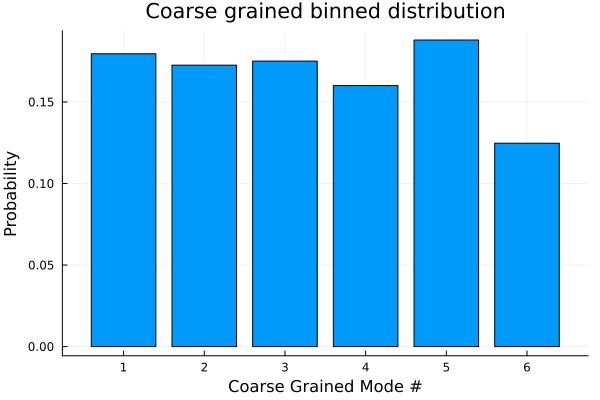

In [32]:
bar(v/(n*numsamples), xlabel="Coarse Grained Mode #", ylabel="Probability", title="Coarse grained binned distribution", legend=false)

In [33]:
sum(v/(n*numsamples))

1.0

In [29]:
vold=v/(n*numsamples)

6-element Vector{Float64}:
 0.17883
 0.17167
 0.17584
 0.16098
 0.18864
 0.12404

In [34]:
vnew=v/(n*numsamples)

6-element Vector{Float64}:
 0.179561
 0.172571
 0.175095
 0.160077
 0.187978
 0.124718

In [71]:
vnewest

6-element Vector{Float64}:
 0.1795569
 0.172606
 0.175519
 0.1596665
 0.1879624
 0.1246892

In [65]:
using LinearAlgebra; 1/2*norm(vnew-vnewest,1)

0.00045900000000001495

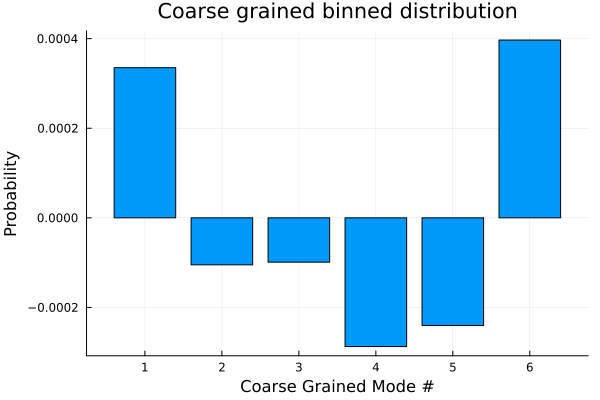

In [131]:
bar(v/(n*numsamples)-vnewest, xlabel="Coarse Grained Mode #", ylabel="Probability", title="Coarse grained binned distribution", legend=false)

In [133]:
numinitstates=100;
numsamples = 100000;
numbins=6;  
sizebin=ceil(Int,m/numbins);
dis = zeros(Real, numinitstates)
elapsed_time = @elapsed for j in 1:numinitstates
    my_input = Input{Bosonic}(ModeOccupation(random_occupancy(n,m)));
    array_of_vectors = [Vector{Int64}(undef, 20) for _ in 1:numsamples];
    for i in 1:numsamples
        res = cliffords_sampler(input=my_input, interf=my_interf)
        array_of_vectors[i]=res
        # Add any necessary code to process or store the results inside the loop
    end
    flattened_data = vcat(array_of_vectors...)
    # if the number of bins doesn't divide the number of modes the last bin will contain fewer modes
    # Initialize v
    v = zeros(Int, numbins)
    # Count the occurrences of each value in w
    counts = countmap(flattened_data)
    # Sum the counts in each range
    for k in 1:numbins
        v[k] = sum(get(counts, s, 0) for s in ((k-1)*sizebin+1):(k*sizebin))
    end
    dis[j] = 1/2*norm(v/(n*numsamples)-vnewest,1)
end
println("Elapsed time: $elapsed_time seconds")

Elapsed time: 14038.303918417 seconds


In [134]:
dis

100-element Vector{Real}:
 0.0011672999999999961
 0.0012272000000000324
 0.0009277999999999856
 0.0010065999999999894
 0.0006354000000000082
 0.0013593999999999898
 0.0002626999999999838
 0.0005087999999999898
 0.0013191000000000105
 0.0007164999999999949
 0.00043359999999999926
 0.0006207999999999769
 0.0011701000000000211
 ⋮
 0.0004964999999999969
 0.0009302999999999811
 0.0007433999999999982
 0.00074769999999999
 0.0006540000000000226
 0.0013553000000000037
 0.0010067999999999883
 0.0004322000000000145
 0.0009896000000000071
 0.0006524000000000252
 0.0013170000000000126
 0.0012762999999999664

In [135]:
sum(dis)/numinitstates

0.0009457000000000006

In [136]:
minimum(dis)

0.0002626999999999838

In [137]:
maximum(dis)

0.0017318999999999946

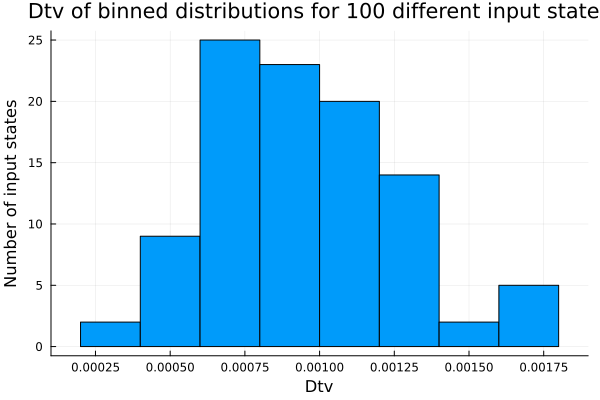

In [145]:
histogram(dis, bins=10, xlabel="Dtv", ylabel="Number of input states", title="Dtv of binned distributions for $numinitstates different input states", legend=false)


In [147]:
140.38/3600

0.03899444444444444